homework 6
---
due: May 3 2022

authors: pegler, prüwasser, scheftner

##  feature selection
 1. add predictors (features) one by one, use X1 only first, and add all predictors sequentially until X6, and plot the obtained score for each model (as a function of the number of predictors)
 2. add predictors in a random order one-by-one, and plot the obtained score for each model
 3. add predictors in the order of the absolute pearson correlation with the outcome variable Y (starting with the largest), and plot the obtained score

### Sequence X1, X2, X3, X4, X5, X6

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('data/Real estate.csv')

y_name = "Y house price of unit area"
x_names = list(df.drop(["No",y_name], axis = 1))

#### Correlation of predictors with outcome

In [14]:
corr_Xy = df.drop("No", axis = 1).corr()[[y_name]].sort_values(y_name).drop(y_name,axis = 0)
corr_Xy

,Y house price of unit area
X3 distance to the nearest MRT station,-0.673613
X2 house age,-0.210567
X1 transaction date,0.087491
X6 longitude,0.523287
X5 latitude,0.546307
X4 number of convenience stores,0.571005


#### Absolute correlation of predictors with outcome

In [15]:
corr_Xy_abs = corr_Xy.abs().sort_values(y_name, ascending=False)
corr_Xy_abs

,Y house price of unit area
X3 distance to the nearest MRT station,0.673613
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
X2 house age,0.210567
X1 transaction date,0.087491


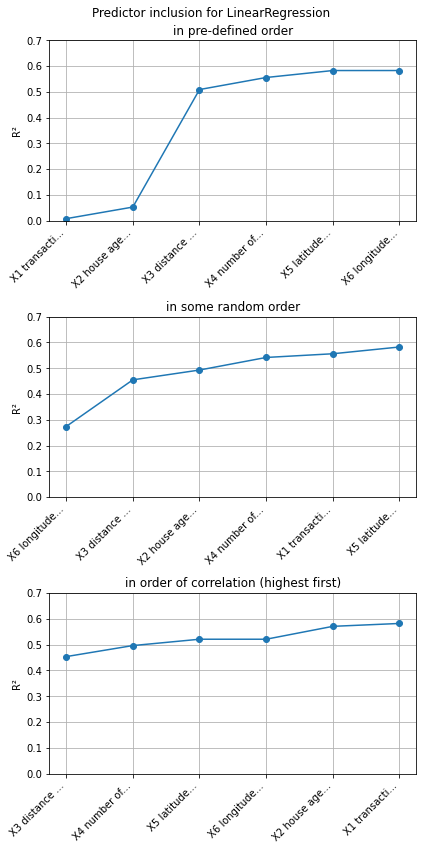

In [95]:
# define plot structure

fig, ax = plt.subplots(3, 1, figsize=(6,12))
fig.suptitle("Predictor inclusion for " + str(reg)[:-2])
ylim_max = 0.7

# plot pre-defined order

scores = []

for i, x_name in enumerate(x_names):

    reg = LinearRegression()
    reg.fit(df[x_names[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names[:i + 1]], df[y_name]))

ax[0].plot(x_names, scores, marker = "o")
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels([name[:12] + "..." for name in x_names], rotation = 45, ha = "right")
ax[0].set_ylabel("R²")
ax[0].set_title("in pre-defined order")
ax[0].set_ylim(0,ylim_max)
ax[0].grid()

# plot random order

np.random.seed(0) 

x_names_random = np.random.choice(x_names, len(x_names), replace = False)

scores = []

for i, x_name in enumerate(x_names_random):

    reg = LinearRegression()
    reg.fit(df[x_names_random[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names_random[:i + 1]], df[y_name]))

ax[1].plot(x_names_random, scores, marker = "o")
ax[1].set_xticks(ax[0].get_xticks())
ax[1].set_xticklabels([name[:12] + "..." for name in x_names_random], rotation = 45, ha = "right")
ax[1].set_ylabel("R²")
ax[1].set_title("in some random order")
ax[1].set_ylim(0,ylim_max)
ax[1].grid();

# plot order by correlation (highest first)

x_names_corr = list(corr_Xy_abs.T)

scores = []

for i, x_name in enumerate(x_names_corr):

    reg = LinearRegression()
    reg.fit(df[x_names_corr[:i + 1]], df[y_name])
    scores.append(reg.score(df[x_names_corr[:i + 1]], df[y_name]))

ax[2].plot(x_names_corr, scores, marker = "o")
ax[2].set_xticks(ax[0].get_xticks())
ax[2].set_xticklabels([name[:12] + "..." for name in x_names_corr], rotation = 45, ha = "right")
ax[2].set_ylabel("R²")
ax[2].set_title("in order of correlation (highest first)")
ax[2].set_ylim(0,ylim_max)
ax[2].grid();

# make space for labels and avoid overlaps

fig.tight_layout()

**The plots look like upside-down scree-plots with one more difference being the missing data point for "no predictor included" (at R² = 0). The pre-defined order shows us a very weak factor is being included at first which is not very good. Even the random inclusion performs better here. The last plot in ascending order of correlation with outcome makes most sense. It also indicates some multicollinearity between latitude and longitude. despite both being considerably correlated with the outcome, they seem to explain the same "thing" and thus one does not add any value over the other one.**

In [96]:
fig.savefig("hw06.png",dpi=300,facecolor='white',bbox_inches="tight");